# Credit Card Clustering and Segmentation

Context:
This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### Loading libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


from scipy.stats import zscore

df = pd.read_csv("ccdata.csv")
df.head()

In C:\Users\tushar\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tushar\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tushar\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\tushar\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tushar\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [2]:
# Check the size and info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
df.shape

(8950, 18)

In [4]:
# Check for missing values. Impute the missing values if there is any
df.isnull().values.any()

True

In [5]:
pd.DataFrame(df.isnull().sum(),columns=['Number of missing values'])

Number of missing values
CUST_ID                                                  0
BALANCE                                                  0
BALANCE_FREQUENCY                                        0
PURCHASES                                                0
ONEOFF_PURCHASES                                         0
INSTALLMENTS_PURCHASES                                   0
CASH_ADVANCE                                             0
PURCHASES_FREQUENCY                                      0
ONEOFF_PURCHASES_FREQUENCY                               0
PURCHASES_INSTALLMENTS_FREQUENCY                         0
CASH_ADVANCE_FREQUENCY                                   0
CASH_ADVANCE_TRX                                         0
PURCHASES_TRX                                            0
CREDIT_LIMIT                                             1
PAYMENTS                                                 0
MINIMUM_PAYMENTS                                       313
PRC_FULL_PAYMENT                                         0
TENURE                                                   0

In [6]:
# We can see that the column 'MINIMUM_PAYMENTS' has a total of 313 nulls, while the column CREDIT_LIMIT has 1 null value

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
# we will replace the nulls in MINIMUM PAYMENTS and CREDIT_LIMIT with the median value

df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median())
df.CREDIT_LIMIT = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median())

pd.DataFrame(df.isnull().sum(),columns=['Number of missing values'])

Number of missing values
CUST_ID                                                  0
BALANCE                                                  0
BALANCE_FREQUENCY                                        0
PURCHASES                                                0
ONEOFF_PURCHASES                                         0
INSTALLMENTS_PURCHASES                                   0
CASH_ADVANCE                                             0
PURCHASES_FREQUENCY                                      0
ONEOFF_PURCHASES_FREQUENCY                               0
PURCHASES_INSTALLMENTS_FREQUENCY                         0
CASH_ADVANCE_FREQUENCY                                   0
CASH_ADVANCE_TRX                                         0
PURCHASES_TRX                                            0
CREDIT_LIMIT                                             0
PAYMENTS                                                 0
MINIMUM_PAYMENTS                                         0
PRC_FULL_PAYMENT                                         0
TENURE                                                   0

In [9]:
# Drop unnecessary columns
# Here customer ID column is a unique value column which is not useful in segmentation and hence we will drop it

In [10]:
dfmod = df.drop('CUST_ID',axis=1)

In [11]:
dfmod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<AxesSubplot:>

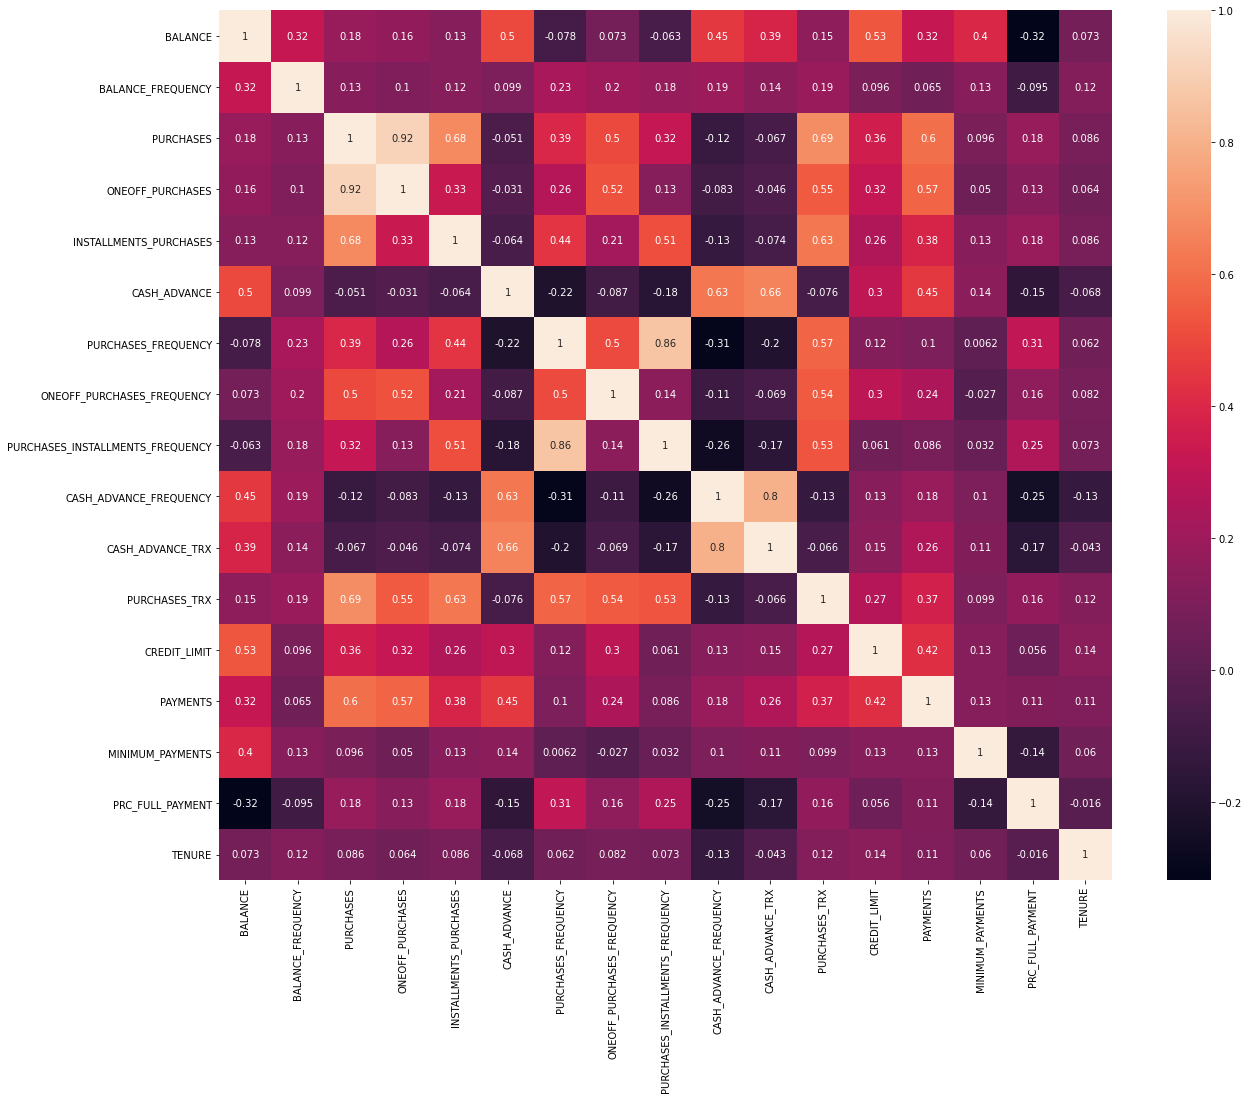

In [12]:
# Check correlation among features and comment your findings.

plt.figure(figsize=(20,16))
sns.heatmap(dfmod.corr(), annot= True)

In [13]:
# 1. Here we see a very high correlation between PURCHASES and ONEOFF_PURCHASES which indicated that customers who are spending
# high are also the customer who are making spending high in one-go.
# 2. Also we see a high correlation between PURCHASE_INSTALLMENT_FREQUENCY and PURCHASES_FREQUENCY the repeated purchases are
# actually indicative of installments

In [14]:
# Check distribution of features and comment your findings.

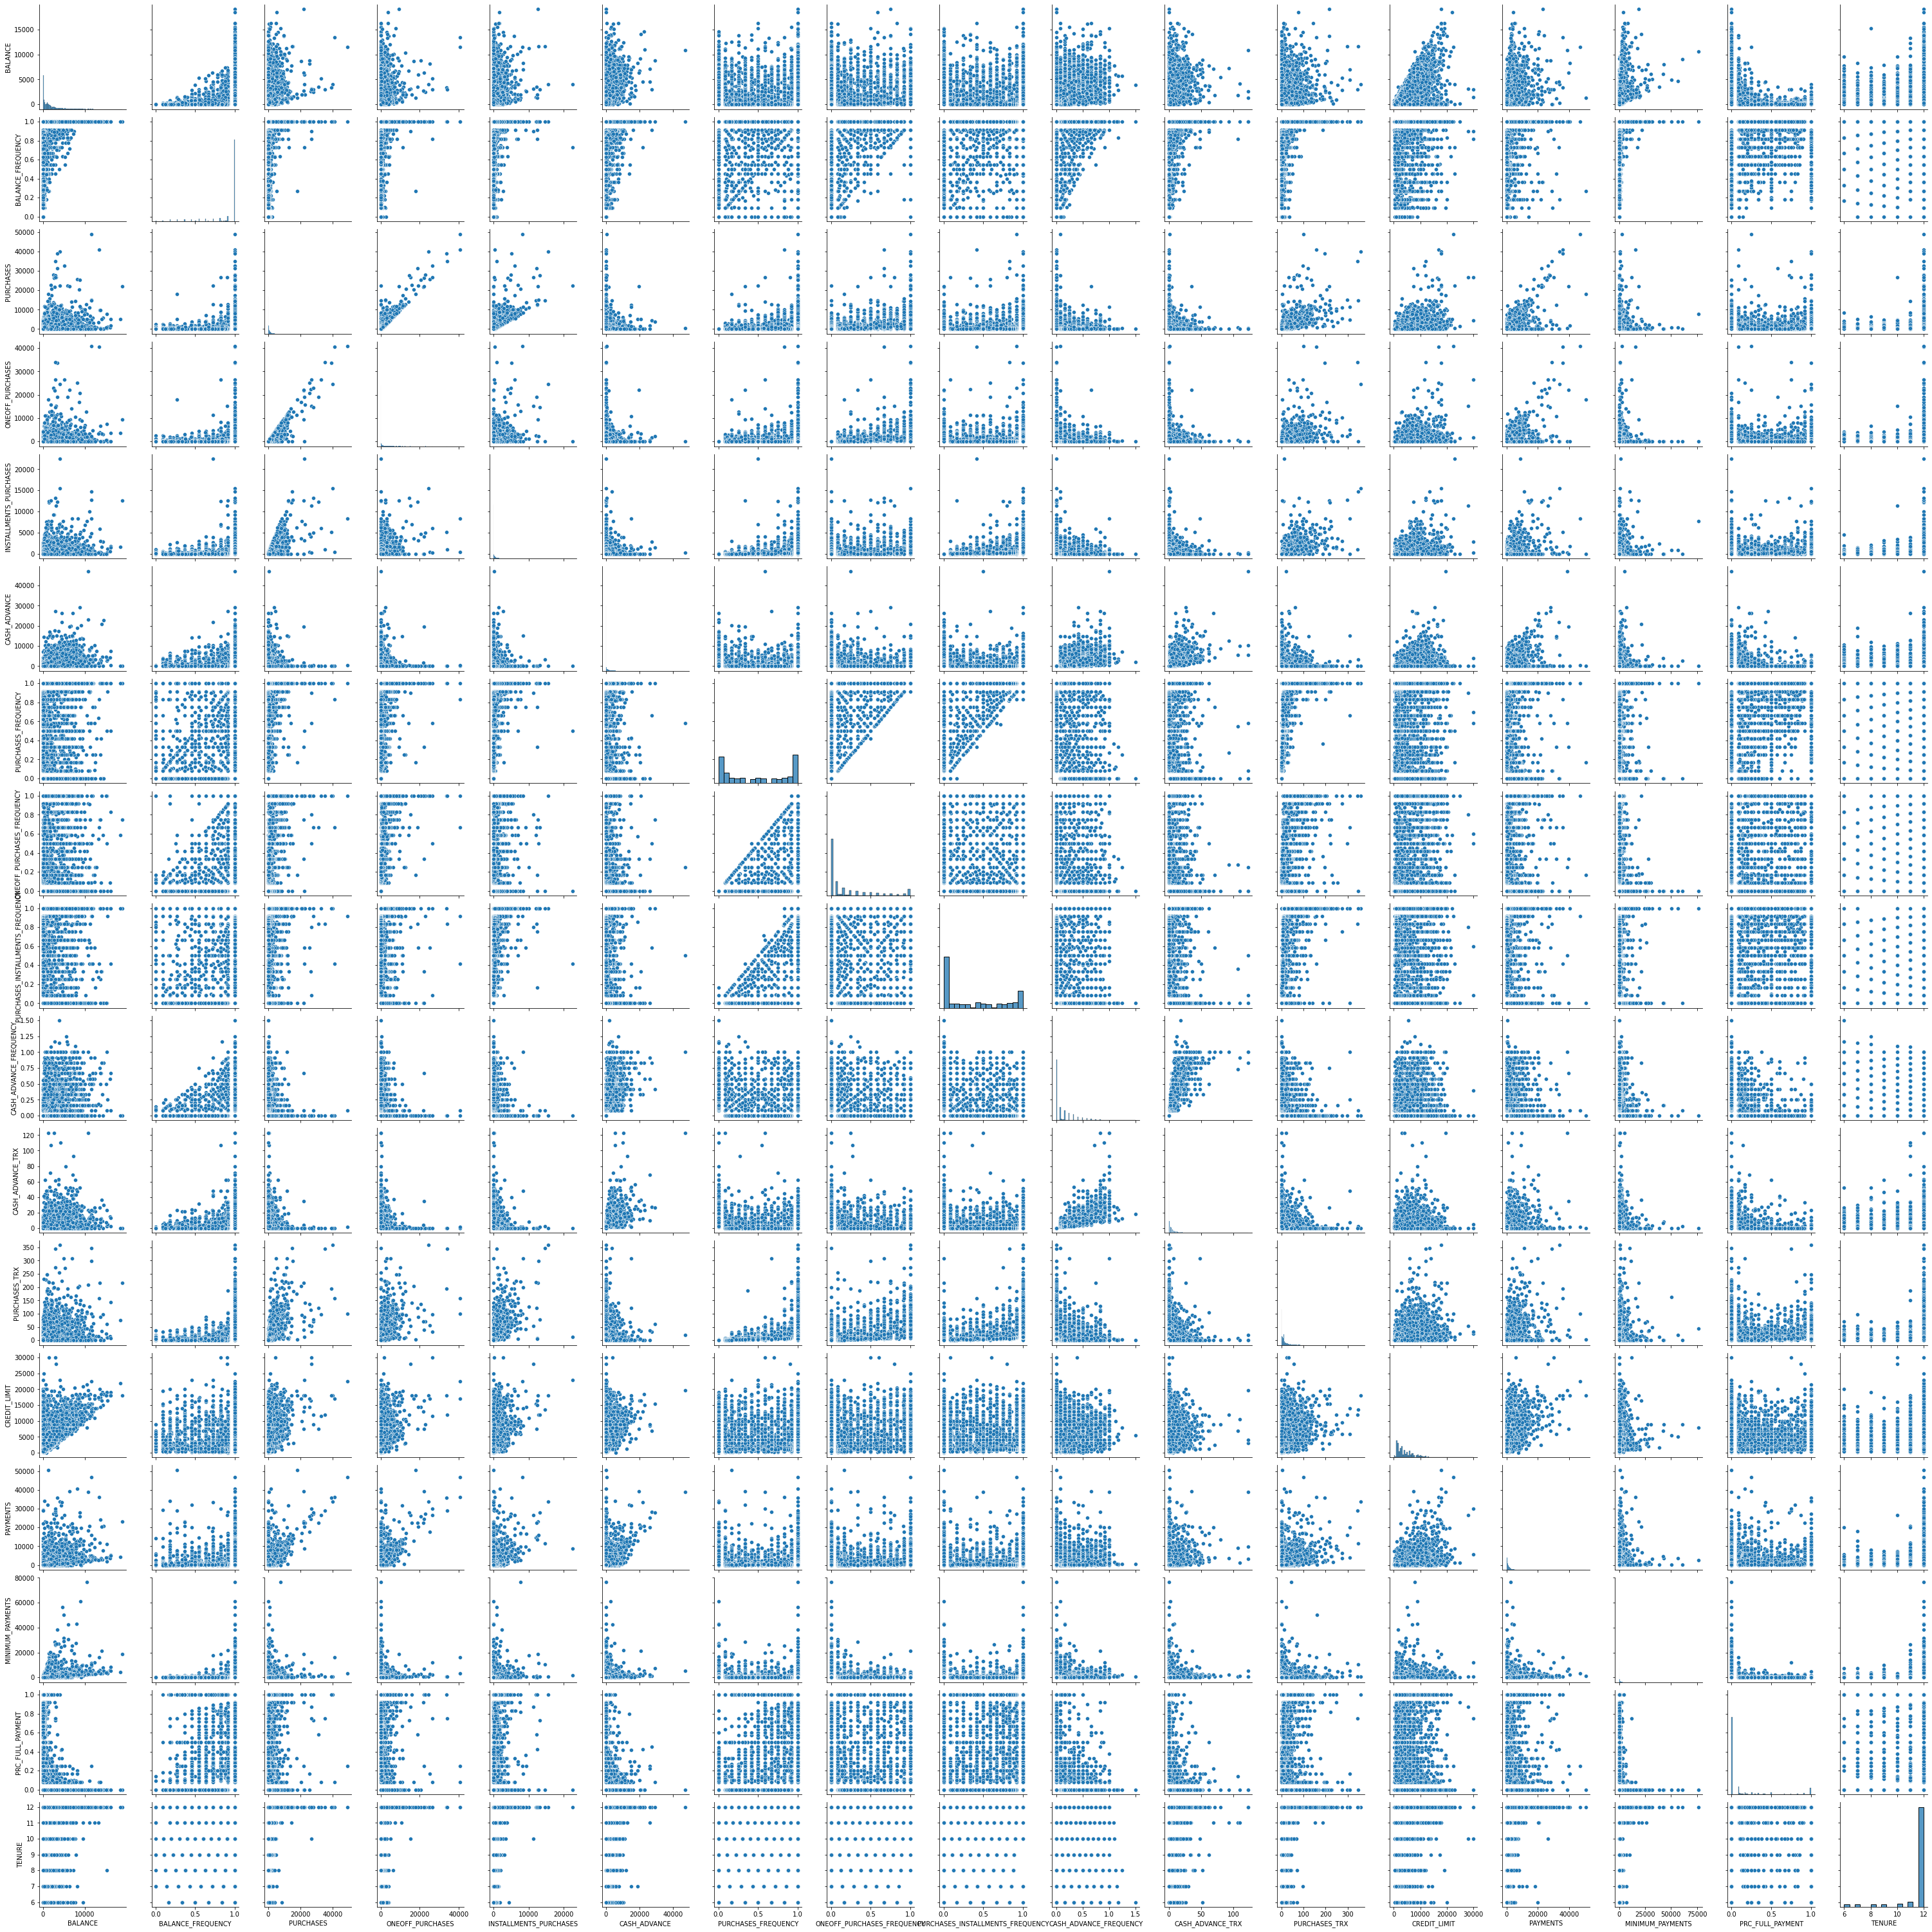

In [15]:
sns.pairplot(dfmod)

C:\Users\tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE', ylabel='Density'>

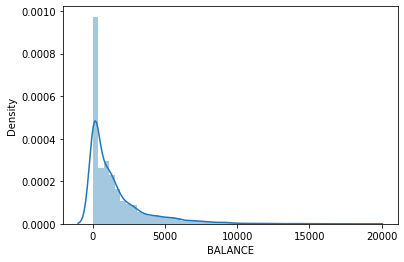

In [16]:
sns.distplot(dfmod.BALANCE)

C:\Users\tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BALANCE_FREQUENCY', ylabel='Density'>

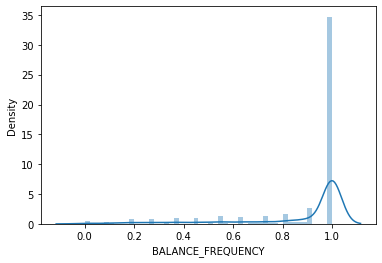

In [17]:
sns.distplot(dfmod.BALANCE_FREQUENCY)

C:\Users\tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PURCHASES', ylabel='Density'>

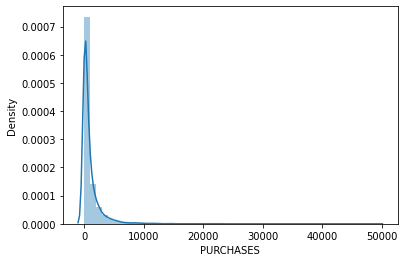

In [18]:
sns.distplot(dfmod.PURCHASES)

C:\Users\tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CASH_ADVANCE', ylabel='Density'>

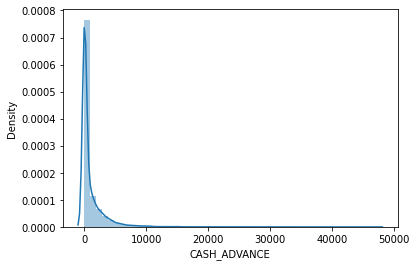

In [19]:
sns.distplot(dfmod.CASH_ADVANCE)

C:\Users\tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PURCHASES_TRX', ylabel='Density'>

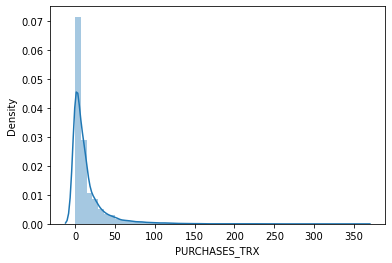

In [20]:
sns.distplot(dfmod.PURCHASES_TRX)

C:\Users\tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

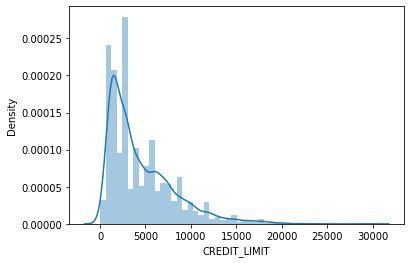

In [21]:
sns.distplot(dfmod.CREDIT_LIMIT)

C:\Users\tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRC_FULL_PAYMENT', ylabel='Density'>

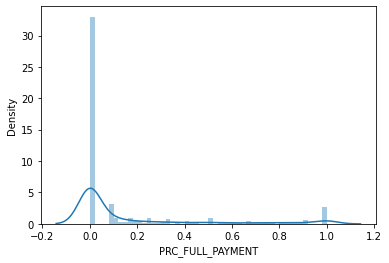

In [22]:
sns.distplot(dfmod.PRC_FULL_PAYMENT)

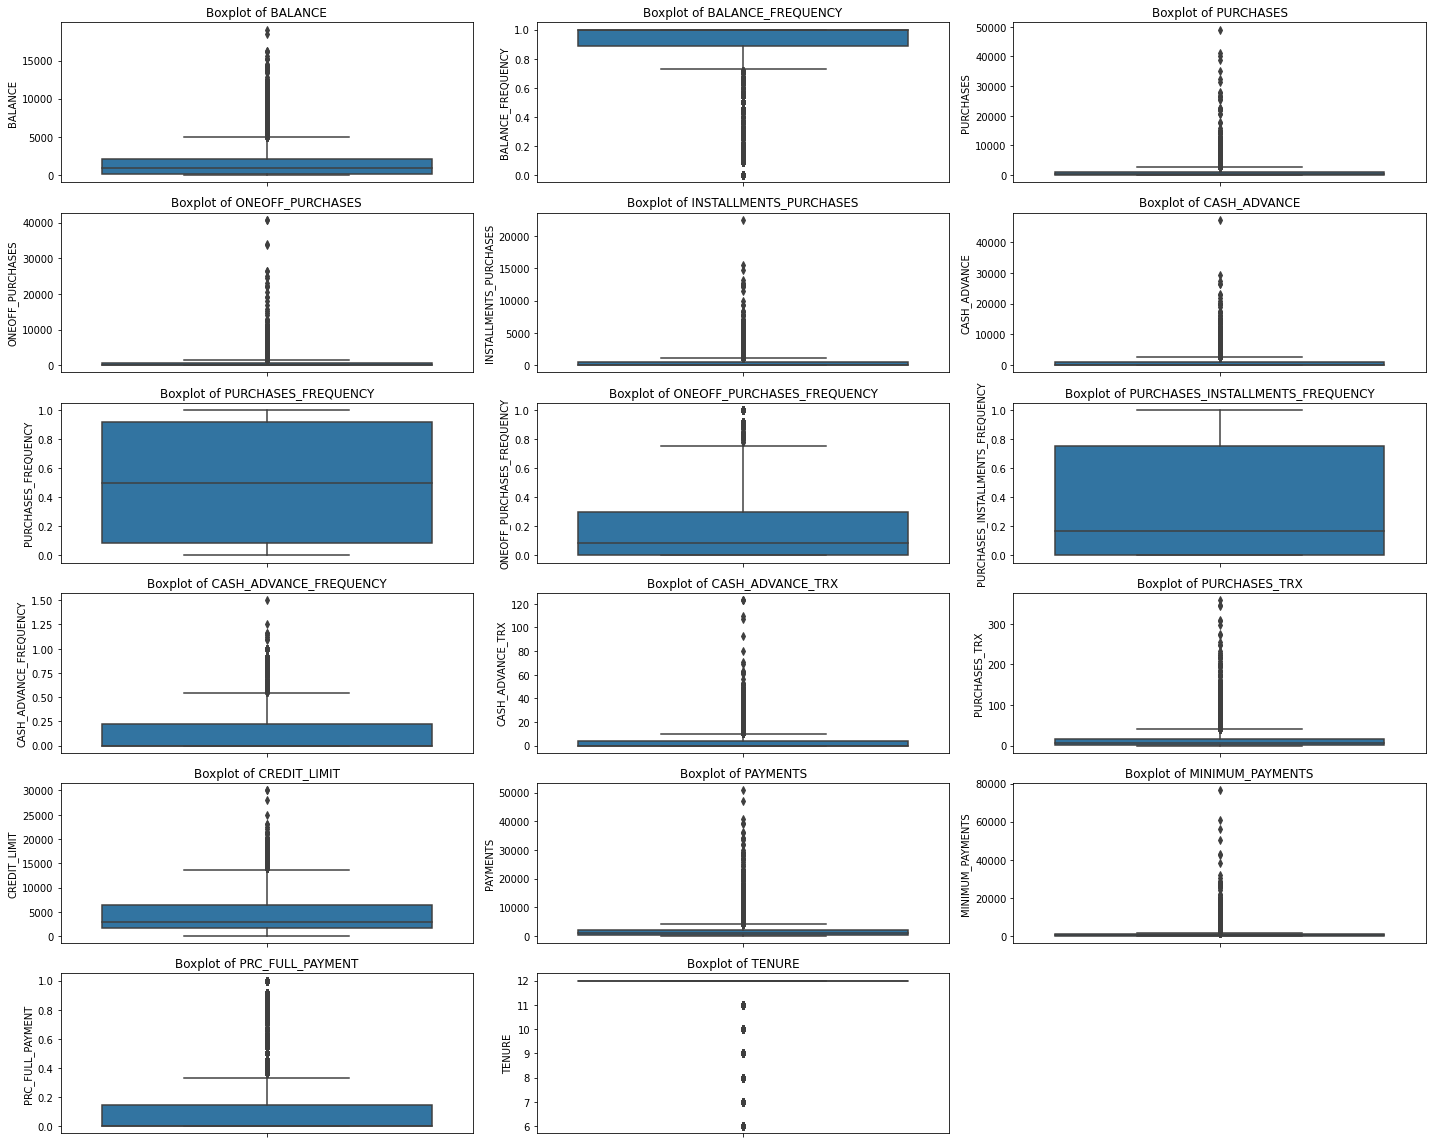

In [23]:
# Outlier detection
plt.figure(figsize = (20,16))
Features = dfmod.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = dfmod[Features[i]], data = dfmod)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()
    
# We observe that there are many outliers in the data. However, we will not remove them since we might miss out on valuable
# information. While building model K-means, we will try to choose distance measure which is less sensitive to outliers

<Figure size 2880x2304 with 0 Axes>

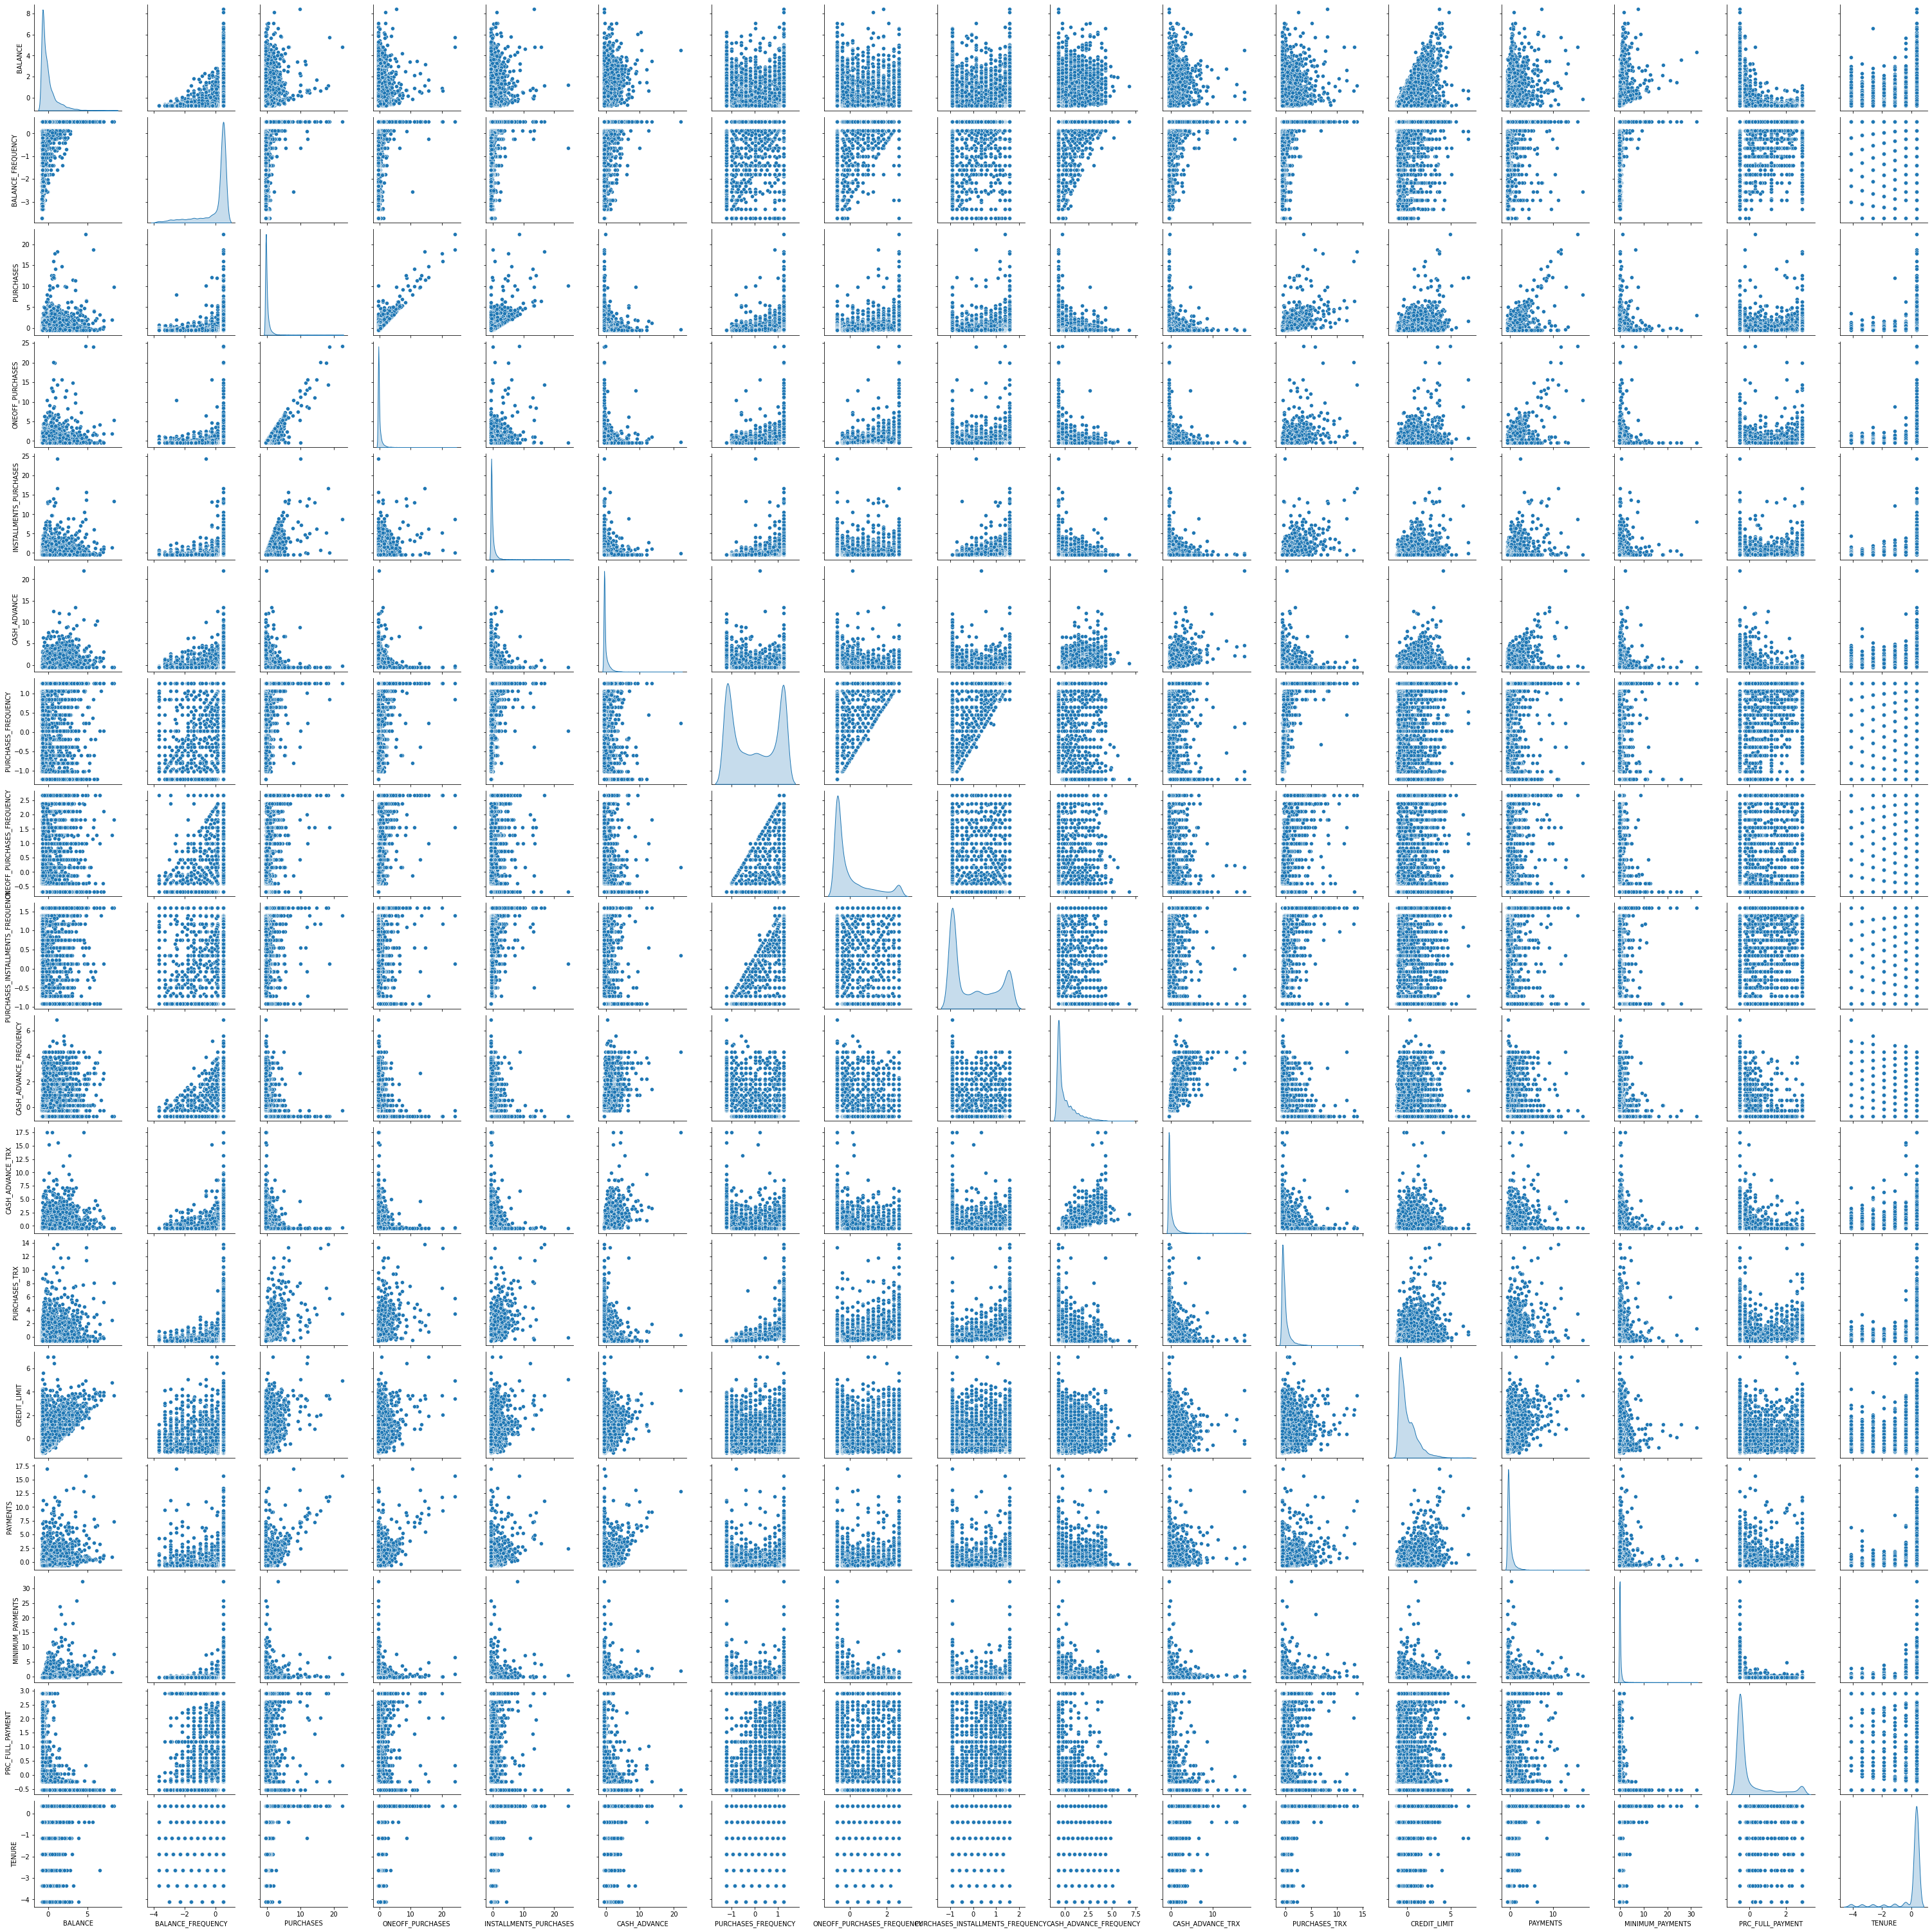

In [24]:
# Standardize the data using appropriate methods
# We will use the z-score transformation to scale the data
plt.figure(figsize = (40,32))
dfscaled = dfmod.apply(zscore)
sns.pairplot(dfscaled,diag_kind='kde')

In [25]:
dfmod2 = dfmod

<AxesSubplot:ylabel='TENURE'>

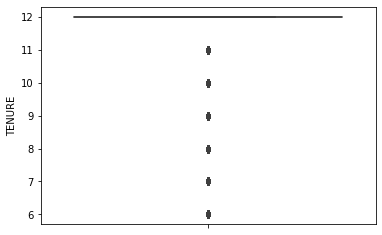

In [26]:
sns.boxplot(y=dfmod2.TENURE, data=dfmod2)

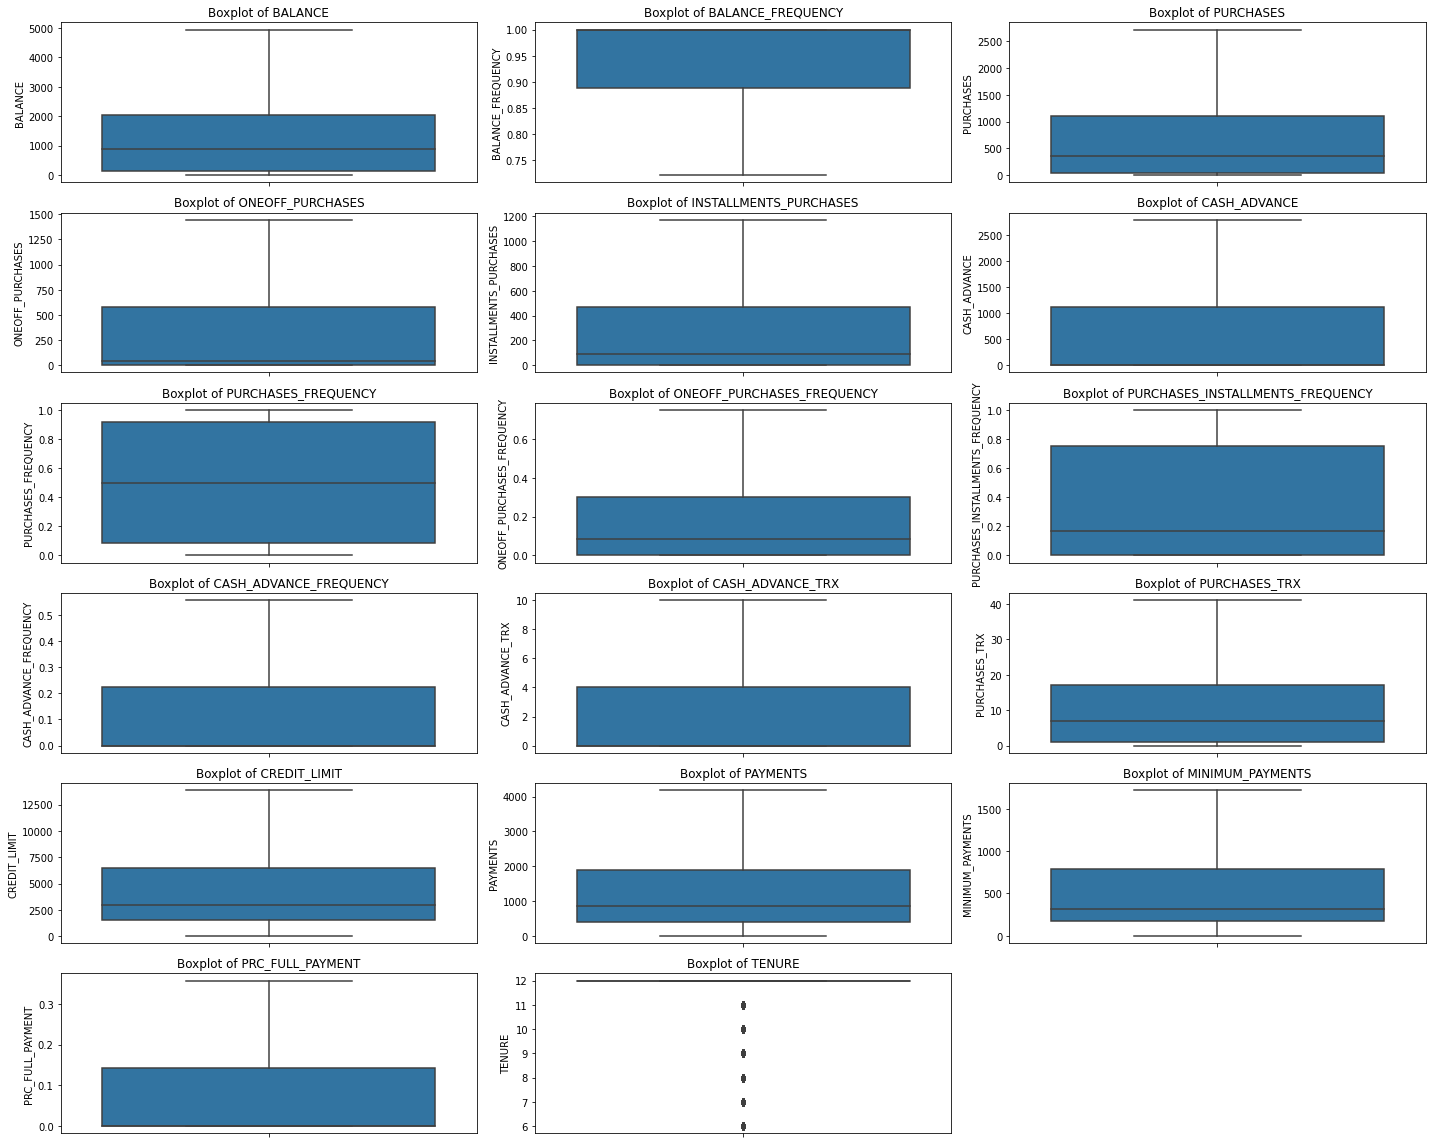

In [27]:
# OUTLIER TREATMENT

def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

feature_list = dfmod2.columns
idx = [16,17]
feature_list = feature_list.delete(idx)
feature_list

for i in feature_list:
    lr, ur = detect_outliers(dfmod2[i])
    dfmod2[i] = np.where(dfmod2[i] > ur, ur,dfmod2[i])
    dfmod2[i] = np.where(dfmod2[i] < lr, lr,dfmod2[i])

plt.figure(figsize = (20,16))
Features = dfmod2.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = dfmod2[Features[i]], data = dfmod2)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [28]:
dfscaled2 = dfmod2.apply(zscore)

# K-means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

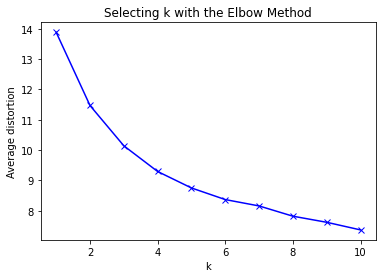

In [29]:
# Build a k-means algorithm for clustering credit card data. Kindly follow the below steps and answer the following. ( 10 points)
# a. Build k means model on various k values and plot the inertia against various k values.
# b. Evaluate the model using Silhouette coefficient
# c. Plot a elbow plot to find the optimal value of k
# d. Which k value gives the best result?


#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,11)
meanDistortions=[]

# We will use Manhatten distance instead of Eucledian because we saw that there are many outliers in data and Euclidean distance
# is very sensitive to outliers
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfscaled2)
    prediction=model.predict(dfscaled2)
    meanDistortions.append(sum(np.min(cdist(dfscaled2, model.cluster_centers_, 'cityblock'), axis=1)) / dfscaled2.shape[0])
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
# From the elbow plot we see that there is sharpe change at K=4 and K=6. We try both K in model and compare which does well 
# using Silhouette coefficient

# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit_predict(dfscaled2)
prediction1=final_model.predict(dfscaled2)

#Calculate Silhouette score
score = silhouette_score(dfscaled2,final_model.labels_,metric='cityblock')
score

0.23848451301180698

In [32]:
# Let us check with K = 6
final_model2=KMeans(6)
final_model2.fit_predict(dfscaled2)
prediction2=final_model2.predict(dfscaled2)

#Calculate Silhouette score
score2 = silhouette_score(dfscaled2,final_model2.labels_,metric='cityblock')
score2

0.21726166048276976

In [33]:
# Let us check with K = 7
final_model3=KMeans(7)
final_model3.fit_predict(dfscaled2)
prediction3=final_model3.predict(dfscaled2)

#Calculate Silhouette score
score3 = silhouette_score(dfscaled2,final_model3.labels_,metric='cityblock')
score3

0.21276463372315266

In [34]:
# We can see that K=4 gives us the best Silhouette score, hence we go with 4 clusters
# We can plot these clusters on box-plot and try to understand how these clusters vary

#Append the prediction 
dfmod2["GROUP"] = prediction1
dfscaled2["GROUP"] = prediction1
print("Groups Assigned : \n")
dfmod.head()

Groups Assigned : 



BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.722223    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    0.750000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
4                0.000000               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  GROUP  
0   201.802084        139.509787          0.000000      12      0  
1  4103.032597       1072.340217          0.222222      12      3  
2   622.066742        627.284787          0.000000      12      2  
3     0.000000        312.343947          0.000000      12      0  
4   678.334763        244.791237          0.000000      12      0

array([[<AxesSubplot:title={'center':'BALANCE'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'CREDIT_LIMIT'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'ONEOFF_PURCHASES'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'PAYMENTS'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'PURCHASES'}, xlabel='[GROUP]'>,
     

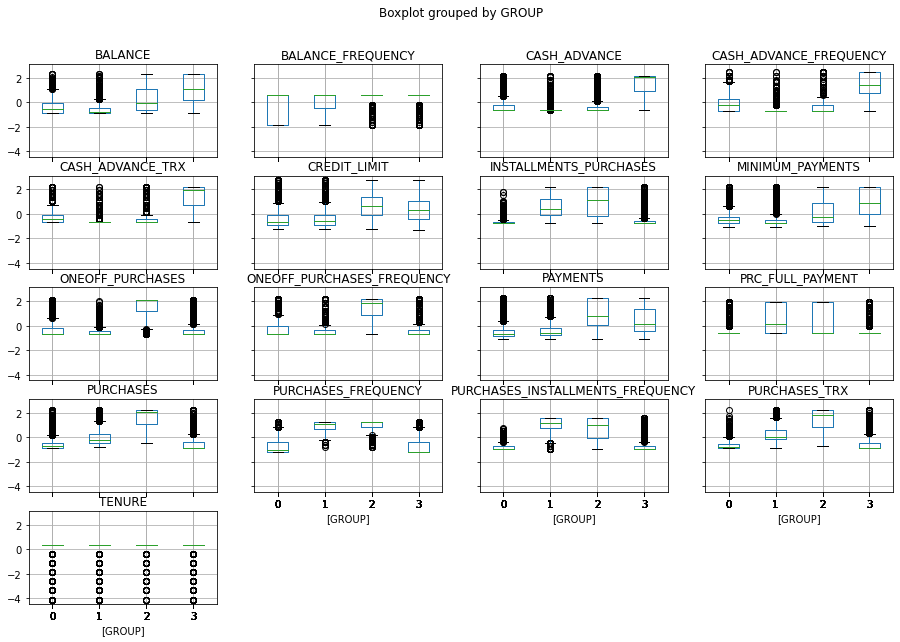

In [35]:
dfscaled2.boxplot(by='GROUP',figsize=(15,10))

# Performing Principle Component Analysis

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=8)
pca.fit(dfscaled2)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
print(pca.explained_variance_)

[5.41731629 4.82418213 1.56487587 1.4332649  1.07847573 0.87470297
 0.65846747 0.54310273]


In [39]:
print(pca.explained_variance_ratio_)

[0.2957082  0.26333153 0.0854199  0.07823582 0.05886939 0.04774631
 0.03594293 0.02964566]


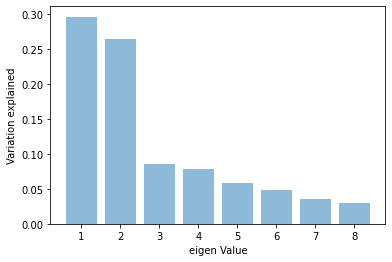

In [40]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

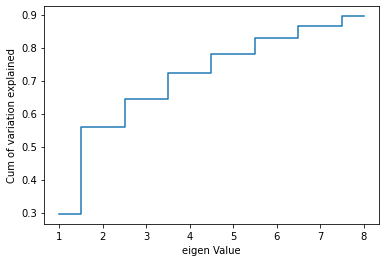

In [41]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

In [42]:
pca8 = PCA(n_components=8)
pca8.fit(dfscaled2)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca8 = pca8.transform(dfscaled2)

[[ 4.19447531e-02  1.22422911e-01  3.91459006e-01  3.10520349e-01
   3.33533619e-01 -9.64176786e-02  3.58531216e-01  3.01615405e-01
   3.01959180e-01 -1.17591861e-01 -1.07107080e-01  3.96092348e-01
   1.61727003e-01  2.09862779e-01  4.42404259e-02  1.28611199e-01
   8.30146076e-02  1.56770346e-01]
 [ 3.81063872e-01  1.67096691e-01  1.43550134e-02  4.26932475e-02
  -3.64347191e-02  3.76753518e-01 -9.74694318e-02  2.77170821e-02
  -9.42622363e-02  3.68382891e-01  3.76720379e-01 -1.13469324e-02
   2.05683904e-01  2.16190869e-01  3.29013656e-01 -1.62303784e-01
   1.43075267e-02  4.01025089e-01]
 [ 1.95496496e-03 -1.61691003e-01  1.61642619e-01  4.65167295e-01
  -3.34323445e-01 -6.06891319e-02 -2.61181455e-01  4.24943941e-01
  -4.97802064e-01 -8.75379606e-02 -9.81447916e-02 -6.12116063e-02
   1.99527195e-01  1.58310321e-01 -8.49862075e-02 -5.27830003e-02
   5.30625139e-02 -1.43346317e-01]
 [-2.94777486e-01 -4.01685041e-01  4.16776879e-02  2.31245944e-02
   3.26063090e-02  2.32758154e-01  1.

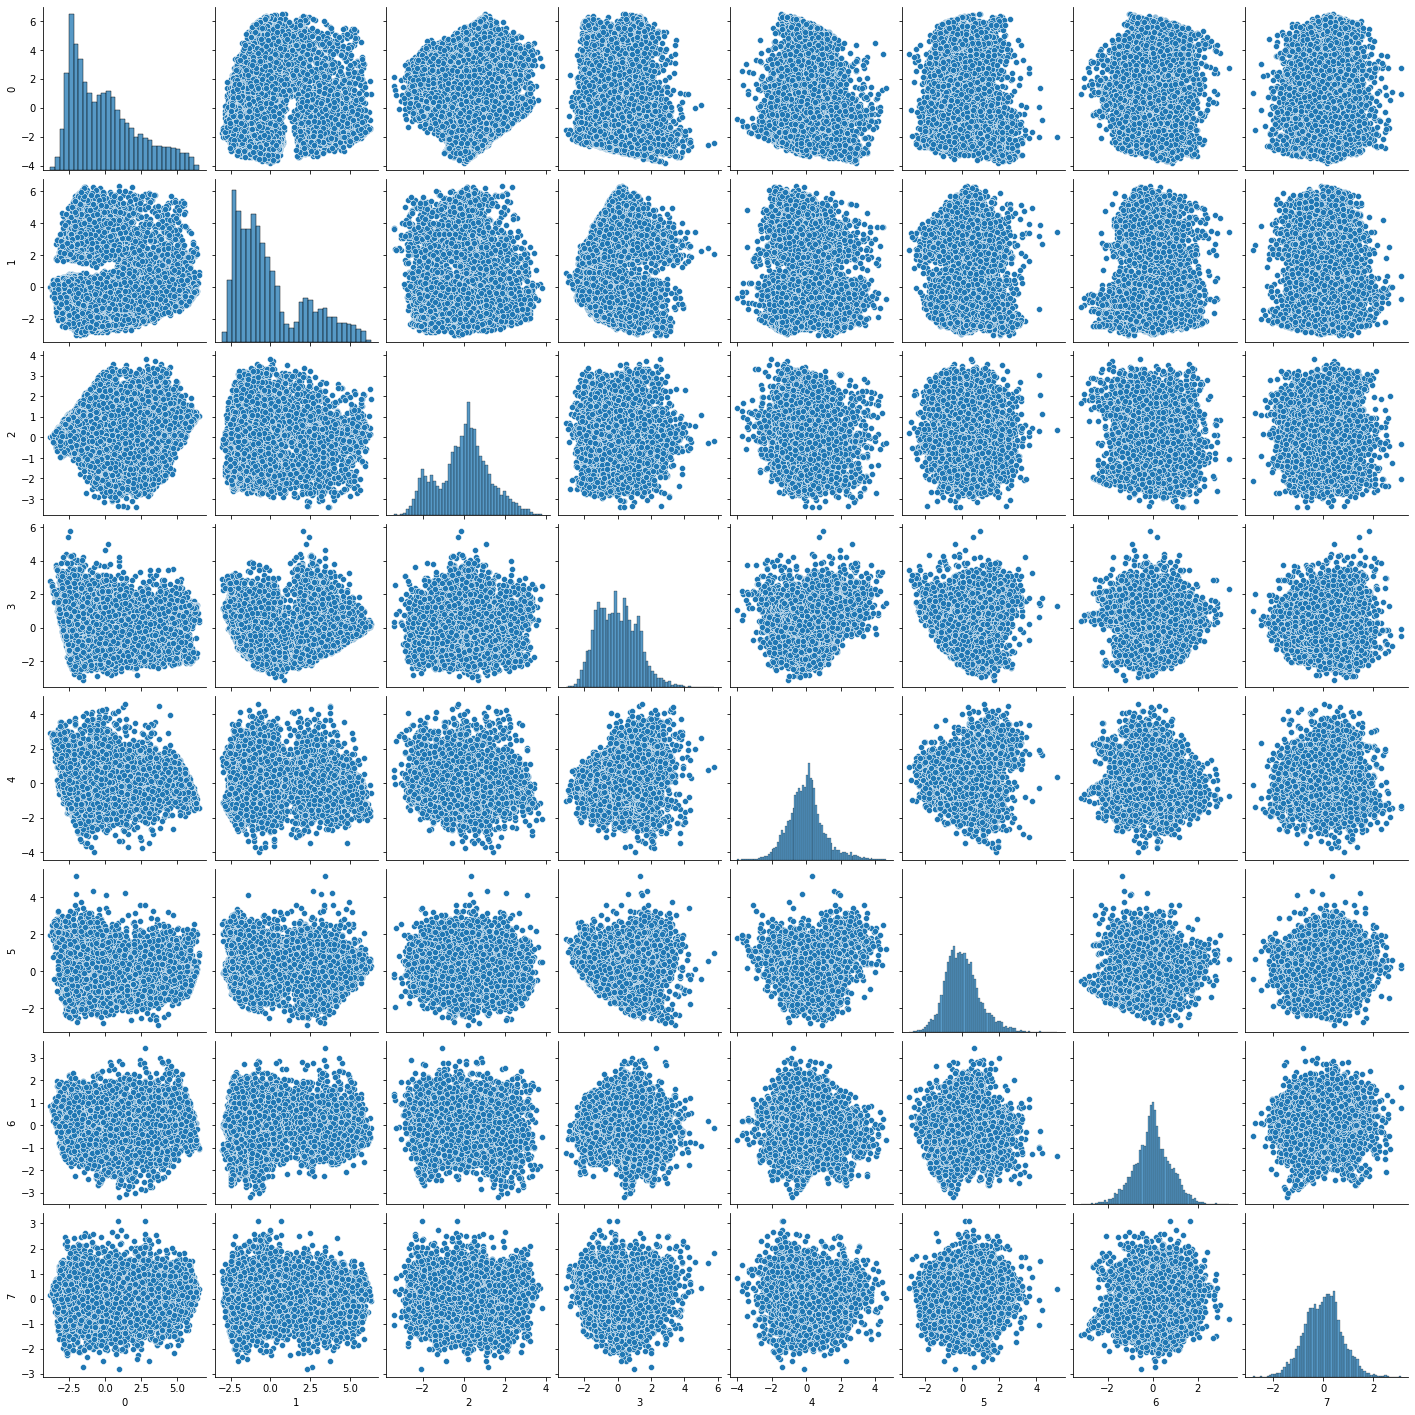

In [43]:
sns.pairplot(pd.DataFrame(Xpca8))

In [44]:
Xpca8.shape

(8950, 8)

<AxesSubplot:>

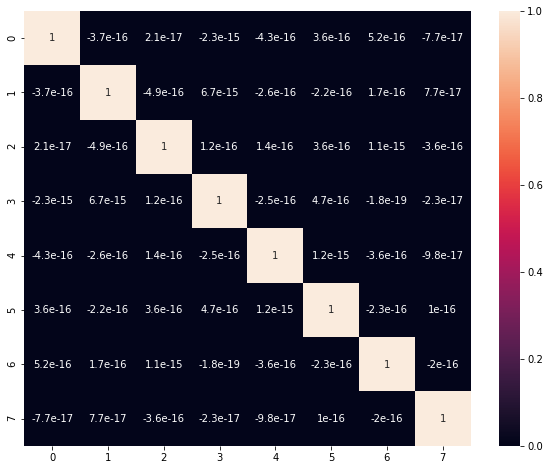

In [45]:
# Check correlation among features and comment your findings.
dfpcascaled = pd.DataFrame(Xpca8)
plt.figure(figsize=(10,8))
sns.heatmap(dfpcascaled.corr(), annot= True)

In [46]:
dfpcascaled

0         1         2         3         4         5         6  \
0    -2.249042 -2.224049  0.317299 -0.494604 -0.180265 -0.020874  0.786750   
1    -1.338622  3.337644  0.238638  1.182616 -2.200244  0.084974 -0.553855   
2     1.312700  0.202481  1.796086 -1.307398  0.756579 -0.118946 -1.490616   
3    -0.776306 -0.930199  2.658598 -0.268018 -0.293688  1.123968  0.923194   
4    -2.106160 -1.540835  0.489915 -1.309840  0.099302 -0.615042 -0.082602   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.232311 -2.468238 -2.064700  2.153175  2.260553  1.411707 -2.382367   
8946 -0.538818 -1.898578 -1.982833  0.704190  3.102817  2.029822 -1.174593   
8947 -1.047942 -2.523784 -1.398055  2.291693  2.181067  2.140013 -1.484366   
8948 -3.004215 -2.013425  0.068463  2.384973  2.169957  1.711473 -1.009398   
8949 -0.202724 -1.345347  2.034321  2.214035  4.259845  1.930111  0.567253   

             7  
0    -0.227179  
1     1.145664  
2    -1.127994  
3    -1.152176  
4     0.592445  
...        ...  
8945  1.502762  
8946  0.912074  
8947  0.777361  
8948  1.422086  
8949 -0.333687  

[8950 rows x 8 columns]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

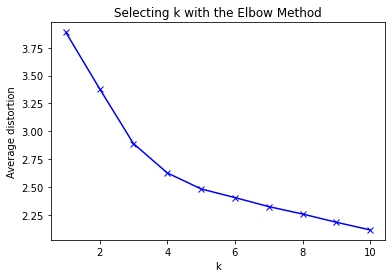

In [47]:
# Build a k-means algorithm for clustering credit card data. Kindly follow the below steps and answer the following. ( 10 points)
# a. Build k means model on various k values and plot the inertia against various k values.
# b. Evaluate the model using Silhouette coefficient
# c. Plot a elbow plot to find the optimal value of k
# d. Which k value gives the best result?


#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,11)
meanDistortions=[]

# We will use Manhatten distance instead of Eucledian because we saw that there are many outliers in data and Euclidean distance
# is very sensitive to outliers
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dfpcascaled)
    prediction=model.predict(dfpcascaled)
    meanDistortions.append(sum(np.min(cdist(dfpcascaled, model.cluster_centers_, 'euclidean'), axis=1)) / dfpcascaled.shape[0])
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [48]:
# Let us first start with K = 4
final_model_pca=KMeans(4)
final_model_pca.fit_predict(dfpcascaled)
prediction1_pca=final_model_pca.predict(dfpcascaled)

#Calculate Silhouette score
score_pca = silhouette_score(dfpcascaled,final_model_pca.labels_,metric='euclidean')
score_pca

0.27055357098000704

In [49]:
# Let us first start with K = 3
final_model_pca2=KMeans(3)
final_model_pca2.fit_predict(dfpcascaled)
prediction1_pca2=final_model_pca2.predict(dfpcascaled)

#Calculate Silhouette score
score_pca2 = silhouette_score(dfpcascaled,final_model_pca2.labels_,metric='euclidean')
score_pca2

0.3078563087384722

array([[<AxesSubplot:title={'center':'0'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'1'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'2'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'3'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'4'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'5'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'6'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'7'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

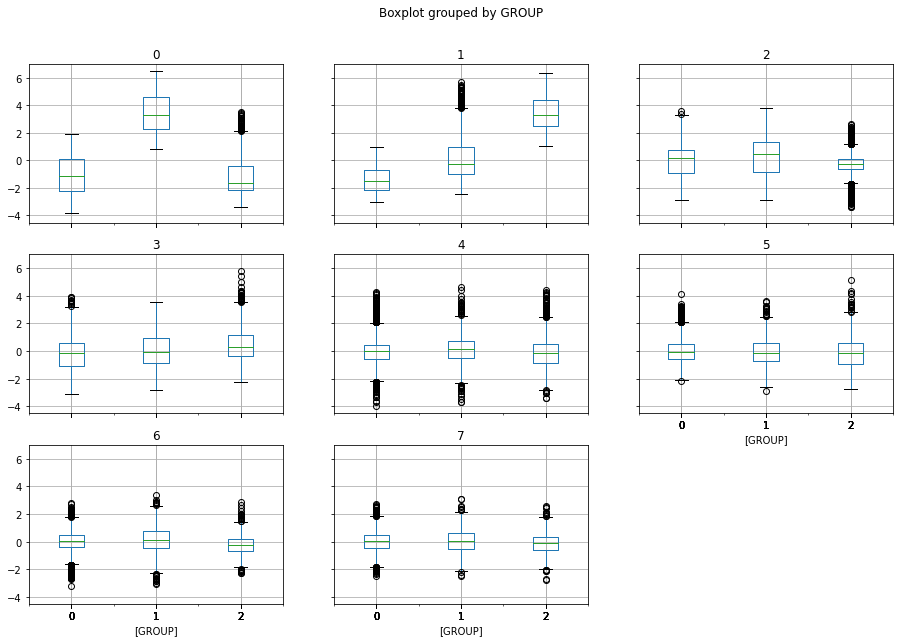

In [50]:
dfpcascaled["GROUP"] = prediction1_pca2
dfpcascaled.boxplot(by='GROUP',figsize=(15,10))